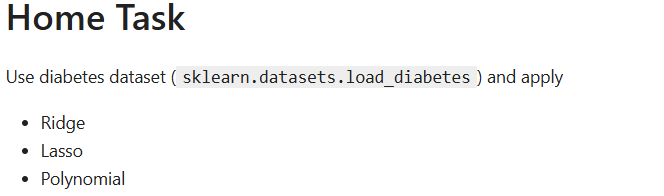

In [162]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

In [164]:
from sklearn.datasets import load_diabetes

In [166]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [168]:
def get_X_y(features= None, verbose= False):
    X, y = load_diabetes(return_X_y=True)

    if features is None:
        print ('Selecting all features')
        
    elif type(features) == int or (type(features) == list and len(features)==1):
        print ('Selecting one feature: {}'.format(features))
        X= X[:,features].reshape(-1,1) 
    elif type(features) == list: 
        print ('Selecting features list: {}'.format(features))
        X= X[:,features]
    else: 
        print ('wrong format of parameter "features"')
        return


    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
    if verbose:
        print ('X_train.shape= ',X_train.shape)
        print ('y_train.shape= ',y_train.shape)
        print ('X_train [:5] = \n{}'.format(X_train[:5]))
        print ('y_train [:5] = \n{}'.format(y_train[:5]))
    return X_train, X_test, y_train, y_test

In [170]:
X_train, X_test, y_train, y_test =  get_X_y(verbose= True)

Selecting all features
X_train.shape=  (331, 10)
y_train.shape=  (331,)
X_train [:5] = 
[[-0.06363517 -0.04464164 -0.03315126 -0.03321323  0.00118295  0.02405115
  -0.02499266 -0.00259226 -0.02251653 -0.05906719]
 [ 0.01264814 -0.04464164 -0.02560657 -0.04009893 -0.03046397 -0.04515466
   0.0780932  -0.0763945  -0.07213275  0.01134862]
 [ 0.03807591  0.05068012  0.00888341  0.04252949 -0.04284755 -0.02104223
  -0.03971921 -0.00259226 -0.01811369  0.00720652]
 [-0.07816532  0.05068012  0.07786339  0.05285804  0.07823631  0.0644473
   0.02655027 -0.00259226  0.04067283 -0.00936191]
 [-0.07453279 -0.04464164 -0.0105172  -0.00567042 -0.06623874 -0.0570543
  -0.00290283 -0.03949338 -0.04257085 -0.0010777 ]]
y_train [:5] = 
[214.  98. 127. 233. 168.]


In [172]:
from sklearn.linear_model import LinearRegression

In [174]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
regressor = lin_reg
print ('Linear Regression')
print ('R2 train score =', regressor.score(X_train, y_train))
print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Linear Regression
R2 train score = 0.5073693366380002
R2 test score = 0.5281729599217633
b: 148.99290898243794, 
w= [ -19.6849459  -240.17712443  557.92071086  251.49875073 -500.35528341
  275.55002947  -11.62872458  154.0055582   651.15320811   77.51418657]


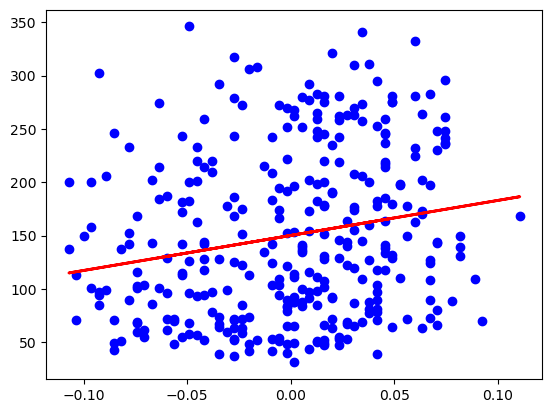

In [196]:
X, y = load_diabetes(return_X_y=True)
X = X[:, 0].reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)# Роблю через train_test_split для уникнення конфілктів

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_train = lin_reg.predict(X_train)

plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, y_pred_train, color = 'red', linewidth = 2)

plt.show()


З графіка видно що лінія лінійної регресії зміщенна до низу оскільки там білше об'єктів, також вона зображає найкраще відношення між елементами 

In [178]:
from sklearn.linear_model import Ridge

In [180]:
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
regressor = ridge_reg
print ('Ridge')
print ('R2 train score =', regressor.score(X_train, y_train))
print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Ridge
R2 train score = 0.025971138202613986
R2 test score = 0.00807012438107857
b: 150.03410102110993, 
w= [138.02365675]


In [182]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)
regressor = lasso_reg
print ('Lasso')
print ('R2 train score =', regressor.score(X_train, y_train))
print ('R2 test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Lasso
R2 train score = 0.0
R2 test score = -0.01317309398904798
b: 149.98791540785498, 
w= [0.]


In [184]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [186]:
poly= PolynomialFeatures(degree=2,include_bias=False) 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler= StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled= scaler.transform(X_test_poly)

print ('X_train.shape= ', X_train_poly.shape)
print ('X_train_poly.shape= ', X_train_poly.shape)

poly_lin_reg = LinearRegression().fit (X_train_poly,y_train)
regressor = poly_lin_reg
print ('Polynomial(We also need to use Linear Regression')
print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

X_train.shape=  (331, 2)
X_train_poly.shape=  (331, 2)
Polynomial(We also need to use Linear Regression
R2 train score = 0.04021679659692745
R2 test score = 0.008051360876620062
b: 147.7558301707917, 
w= [ 343.35123684 1069.41294684]
